In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# dane = pd.read_csv('../DataIn/004_mieszkania.csv') 
dane = pd.read_csv('../DataIn/004_mieszkania_600.csv') 
X = dane.iloc[:, 0:1].values # wyekstrahowanie kolumny pierwszej z metrażem (format -> [[0],[1],[2], ...])
y = dane.iloc[:, -1].values # wyekstrahowanie ostatniej kolumny z ceną (format -> [0, 1, 2, ...])
y = y.reshape(-1, 1) # na tablicę dwuwymiarową dla StandardScaler()

X_scaler = StandardScaler() # stworzenie obiektów normalizacji
y_scaler = StandardScaler()
X_norm = X_scaler.fit_transform(X) # normalizacja
y_norm = y_scaler.fit_transform(y)

In [3]:
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='sgd', max_iter=1000, random_state=42)
model.fit(X_norm, y_norm.ravel()) 

MLPRegressor(max_iter=1000, random_state=42, solver='sgd')

In [4]:
# Wizualizacja polega na stworzeniu tablicy X-ów na tyle gęstych żeby było widać dokładny przebieg krzywej modelu, (ilość punktów X = (max(X)-min(X)/2))
X_in = np.linspace(np.min(X), np.max(X), int((np.max(X)-np.min(X))/2)) # wygenerowanie X wejściowych w zakresie danych wejściowych między min(X) - max(X)
X_in = X_in.reshape(-1, 1) # konwersja do tablicy dwuwymiarowej
# przygotowanie danych do wyświetlania i powrót z danych znormalizowanych do pierwotnych
X_norm = X_scaler.transform(X_in) # normalizacja nowo stworzonych X

In [5]:
prognoza_norm = model.predict(X_norm) # prognozowanie na danych znormalizowanych
prognoza_norm = prognoza_norm.reshape(-1,1) # konwersja do tablicy dwuwymiarowej 
prognoza_linear = y_scaler.inverse_transform(prognoza_norm) # powrót do danych nieznormalizowanychplt.scatter(X, y, color='red')

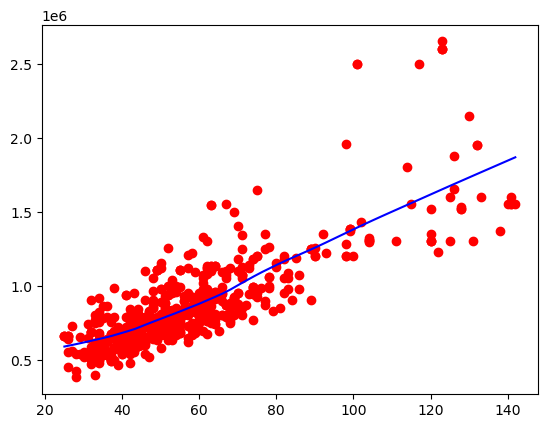

In [6]:
plt.scatter(X, y, color='red')
plt.plot(X_in, prognoza_linear, color='blue') 
plt.show()